In [1]:
import zipfile
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd '/content/drive/MyDrive/Tenx program/week-6'

/content/drive/MyDrive/Tenx program/week-6


In [3]:
from scripts.eda_preprocessing import (
    load_minimal,
    basic_eda,
    basic_eda_streamed,
    filter_and_clean,
    chunked_filter_and_clean,
)

In [4]:
from pathlib import Path

ZIP = Path("complaints.csv.zip")
CSV = "complaints.csv"
OUT = Path("data/filtered_complaints.csv")

In [5]:
# 1) Minimal-column, top-n-rows load + EDA
df_small = load_minimal(ZIP, CSV)
basic_eda(df_small)


=== DATAFRAME INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 2 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   Product                       category
 1   Consumer complaint narrative  object  
dtypes: category(1), object(1)
memory usage: 25.8+ MB
None

=== HEAD ===
                                             Product  \
0  Credit reporting or other personal consumer re...   
1                                    Debt collection   
2  Credit reporting or other personal consumer re...   
3  Credit reporting or other personal consumer re...   
4  Credit reporting or other personal consumer re...   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

=== PRODUCT VALUE COUNTS ===
Product
Credit reporting or other personal consume

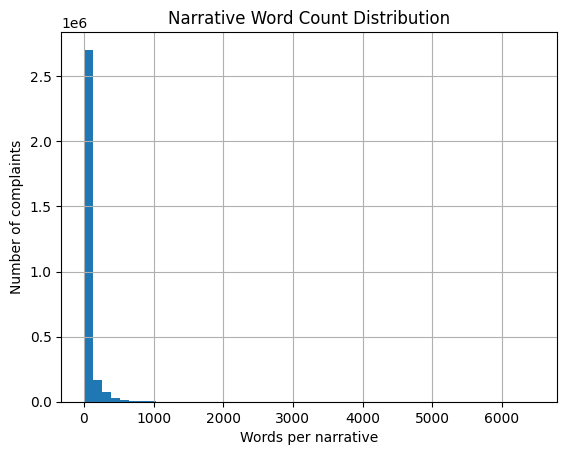

In [6]:
import matplotlib.pyplot as plt

df_small["narr_len"].hist(bins=50)
plt.title("Narrative Word Count Distribution")
plt.xlabel("Words per narrative")
plt.ylabel("Number of complaints")
plt.show()


In [7]:
# 2) Streamed EDA on top SAMPLE_NROWS
basic_eda_streamed(ZIP, CSV)

Total rows processed (sampled): 3000000
Complaints by product:
  Credit reporting or other personal consumer reports: 2520552
  Debt collection: 140990
  Credit reporting, credit repair services, or other personal consumer reports: 103119
  Money transfer, virtual currency, or money service: 56205
  Credit card: 52669
  Checking or savings account: 51874
  Mortgage: 20270
  Student loan: 15802
  Vehicle loan or lease: 11266
  Credit card or prepaid card: 6106
  Payday loan, title loan, personal loan, or advance loan: 5993
  Credit reporting: 5241
  Prepaid card: 3989
  Debt or credit management: 2410
  Bank account or service: 1820
  Payday loan, title loan, or personal loan: 771
  Consumer Loan: 663
  Payday loan: 147
  Money transfers: 94
  Other financial service: 19
Empty/missing narratives: 2295846
Narrative word counts — min=0, mean=39.5, std=125.3, max=6469


In [8]:
# 3) Filter & clean on sample, writing to OUT
chunked_filter_and_clean(ZIP, CSV, OUT)
rows = sum(1 for _ in open(OUT)) - 1
print("Total filtered complaints:", rows)

Total filtered complaints: 314955
